<a href="https://colab.research.google.com/github/sonalsrivas/Attendance-Project/blob/master/Random_Forest_Concrete_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Random Forest algorithm** is a kind of bootstrapping ensemble learning where not one but many machine learning models are used to arrive at a more accurate model.


*A FANTASTIC INTRO HERE - https://towardsdatascience.com/random-forest-and-its-implementation-71824ced454f*

Ensemble Learning-> Boosting and Bootstraping



In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
print(os.listdir(r'/content/gdrive/My Drive/Colab Notebooks'))

# Importing the libraries
import numpy as np
import pandas as pd

#Importing Data
#data1=pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/basicshit.xlsx")
data1=pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Concrete Data-Stone-Dust-NEW.xlsx")

#### CAN BE CHANGED
data1.columns = ['cement','furnace_slag','fly_ash','water', 'super_plasticizer','coarse_agg','fine_agg','stone_dust','age','compressive_strength']

Mounted at /content/gdrive
['Conversion Word Problems.ipynb', 'General.ipynb', 'Numeral Unit Separation.ipynb', 'ConversionWordProblemsMP.ipynb', 'Untitled', 'Untitled0.ipynb', 'NumeralUnitSeparationMP.ipynb', 'main.ipynb', 'Copy of main.ipynb', 'Word Number.ipynb', 'Corrected Main2.ipynb', 'type of series Program.ipynb', 'Up and Running Main.ipynb', 'TwitterSentiment_AV_test_tweets_anuFYb8.csv', 'TwitterSentiment_AV_train_E6oV3lV.csv', 'Untitled1.ipynb', 'TwitterSentimentAnalysiswithTFIDF.ipynb', 'Tetris Project.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'codechef july challenge 2020 practice.ipynb', 'Garvit Solution.ipynb', 'Untitled4.ipynb', 'introqcqh-lab-1.zip', 'lab-1.ipynb', 'Untitled5.ipynb', 'Sept2020 Codechef Long.ipynb', 'DATA-RS-1-BLANK.gsheet', 'DATA-RS-1-BLANK - Table.csv', 'DATA-RS-1-BLANK - Table.gsheet', 'Dad ANN.xlsx', 'ANN classification Dads Data.ipynb', 'ANN labelled-weak.ipynb', '  -Copy of Random Forest -Copy of ANN labelled-weak.ipynb', 'Concrete_Data.xls', '

In [ ]:
data1=data1.fillna(0)
print("Number of rows    :",data1.shape[0])
print("Number of columns :",data1.shape[1])
for colname in data1.columns:
  if data1[colname].isnull().values.any():
    print("Number of values that have NaN value in this column => ",colname,data1[colname].isnull().sum())
  print(f"checked {colname}")
data1.isnull().sum().sum()

Number of rows    : 1705
Number of columns : 10
checked cement
checked furnace_slag
checked fly_ash
checked water
checked super_plasticizer
checked coarse_agg
checked fine_agg
checked stone_dust
checked age
checked compressive_strength


0

## Parameters of train_test_split
**test_size**: to specify the percentage of data instances taken as test divided by 100; default is 0.25

**random_state**: an integer explicitely passed here would lead to you having a reproducible splitting of the dataset; not specifying this argument would lead to it being set to np.random.RandomState which is a mersenne twister.


In [ ]:
dataSet=data1
dataSet.fillna(0)
#Splitting train and test data
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
train,test = train_test_split(dataSet, test_size = 0.3, random_state = 123)
train_X = train[[x for x in train.columns if x not in ["compressive_strength"]]]# + ["age_months"]]]
train_Y = train["compressive_strength"]
test_X  = test[[x for x in test.columns if x not in ["compressive_strength"]]]# + ["age_months"]]]
test_Y  = test["compressive_strength"]

In [ ]:
train.columns

Index(['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer',
       'coarse_agg', 'fine_agg', 'stone_dust', 'age', 'compressive_strength'],
      dtype='object')

## Libraries for plot graph presentation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

**Mean Squared Error (MSE)** : the mean squared difference between the estimated values and the actual value.

**R square score** : the proportion of the variance in the dependent variable that is predictable from the independent variable.

**What is a good r2 score?**
It depends on your research work but more then 50%, R2 value with low RMES value is acceptable to scientific research community, Results with low R2 value of 25% to 30% are valid because it represent your findings.

--------------------------------------------

**RandomForestRegressor Parameter**

n_estimator : specifies the number of decision trees in the random forest; default value is 100.

--------------------------------------------

**plt.figure Parameter**

figsize: specify widh and height in inches




train error:
R2	: 0.99 
RMS	: 1.4827332553476444 

test error:
R2	: 0.92 
RMS	: 4.314716596725604 

comparision b/w predicted value and actual test value 


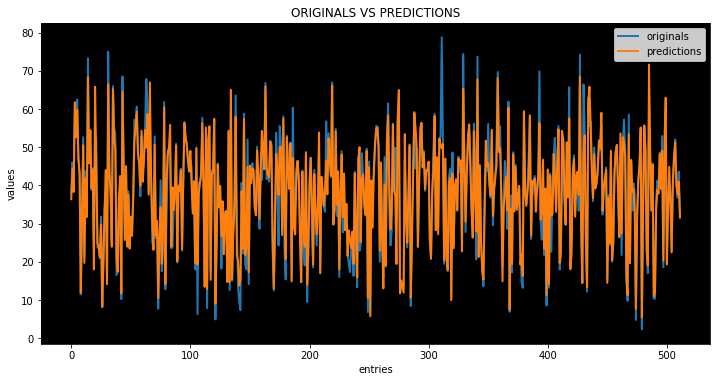

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model = RandomForestRegressor(n_estimators=200, n_jobs=-1)
model.fit(train_X,train_Y)

predict_train_Y= model.predict(train_X)
r2score=("%.2f" % r2_score(train_Y,predict_train_Y))
rms=np.sqrt(mean_squared_error(train_Y,predict_train_Y))
print("train error:\nR2\t:",r2score,"\nRMS\t:",rms,"\n")

predict_test_Y= model.predict(test_X)
r2score=("%.2f" % r2_score(test_Y,predict_test_Y))
rms=np.sqrt(mean_squared_error(test_Y,predict_test_Y))
print("test error:\nR2\t:",r2score,"\nRMS\t:",rms,"\n")

print("comparision b/w predicted value and actual test value ")

plt.figure(figsize=(13,28))
plt.subplot(211)
prediction = pd.DataFrame(predict_test_Y)  
testy = test_Y.reset_index()["compressive_strength"]
    
ax = testy.plot(label="originals",figsize=(12,13),linewidth=2)
ax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)

plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("entries")
plt.ylabel("values")
ax.set_facecolor("k")

In [ ]:
'''
inputName=["cement","furnace_slag","fly_ash","water","super_plasticizer","coarse_agg","fine_agg","age"]
new=[]
for i in inputName:
  print(i,":",end='\t\t')
  new.append(float(input()))
new_X=np.array(new).reshape(1,-1)
predict_new_Y = model.predict(new_X)
print(int(predict_new_Y))
'''

'\ninputName=["cement","furnace_slag","fly_ash","water","super_plasticizer","coarse_agg","fine_agg","age"]\nnew=[]\nfor i in inputName:\n  print(i,":",end=\'\t\t\')\n  new.append(float(input()))\nnew_X=np.array(new).reshape(1,-1)\npredict_new_Y = model.predict(new_X)\nprint(int(predict_new_Y))\n'

In [ ]:
#train_X =pd.DataFrame(train_X)
#test_X =pd.DataFrame(test_X)

#train_Y =pd.DataFrame(train_Y)
#test_Y =pd.DataFrame(test_Y)

pred_train_Y =pd.DataFrame(predict_train_Y)
pred_test_Y = pd.DataFrame(predict_test_Y)


XX=pd.concat([train_X,test_X],ignore_index=True)
YY=pd.concat([train_Y,test_Y],ignore_index=True)
RR=pd.concat([pred_train_Y,pred_test_Y],ignore_index=True)

XX.columns = ['cement','blast_furnace','fly_ash','water', 'superplasticizer','coarse_agg','fine_agg','stone_dust','age']#,'strength']

XX['Experimental_R']=YY
XX['Prediction_R']=RR
XX.to_csv("prediction_results_RF.csv")


# DATE: 21 September 2021

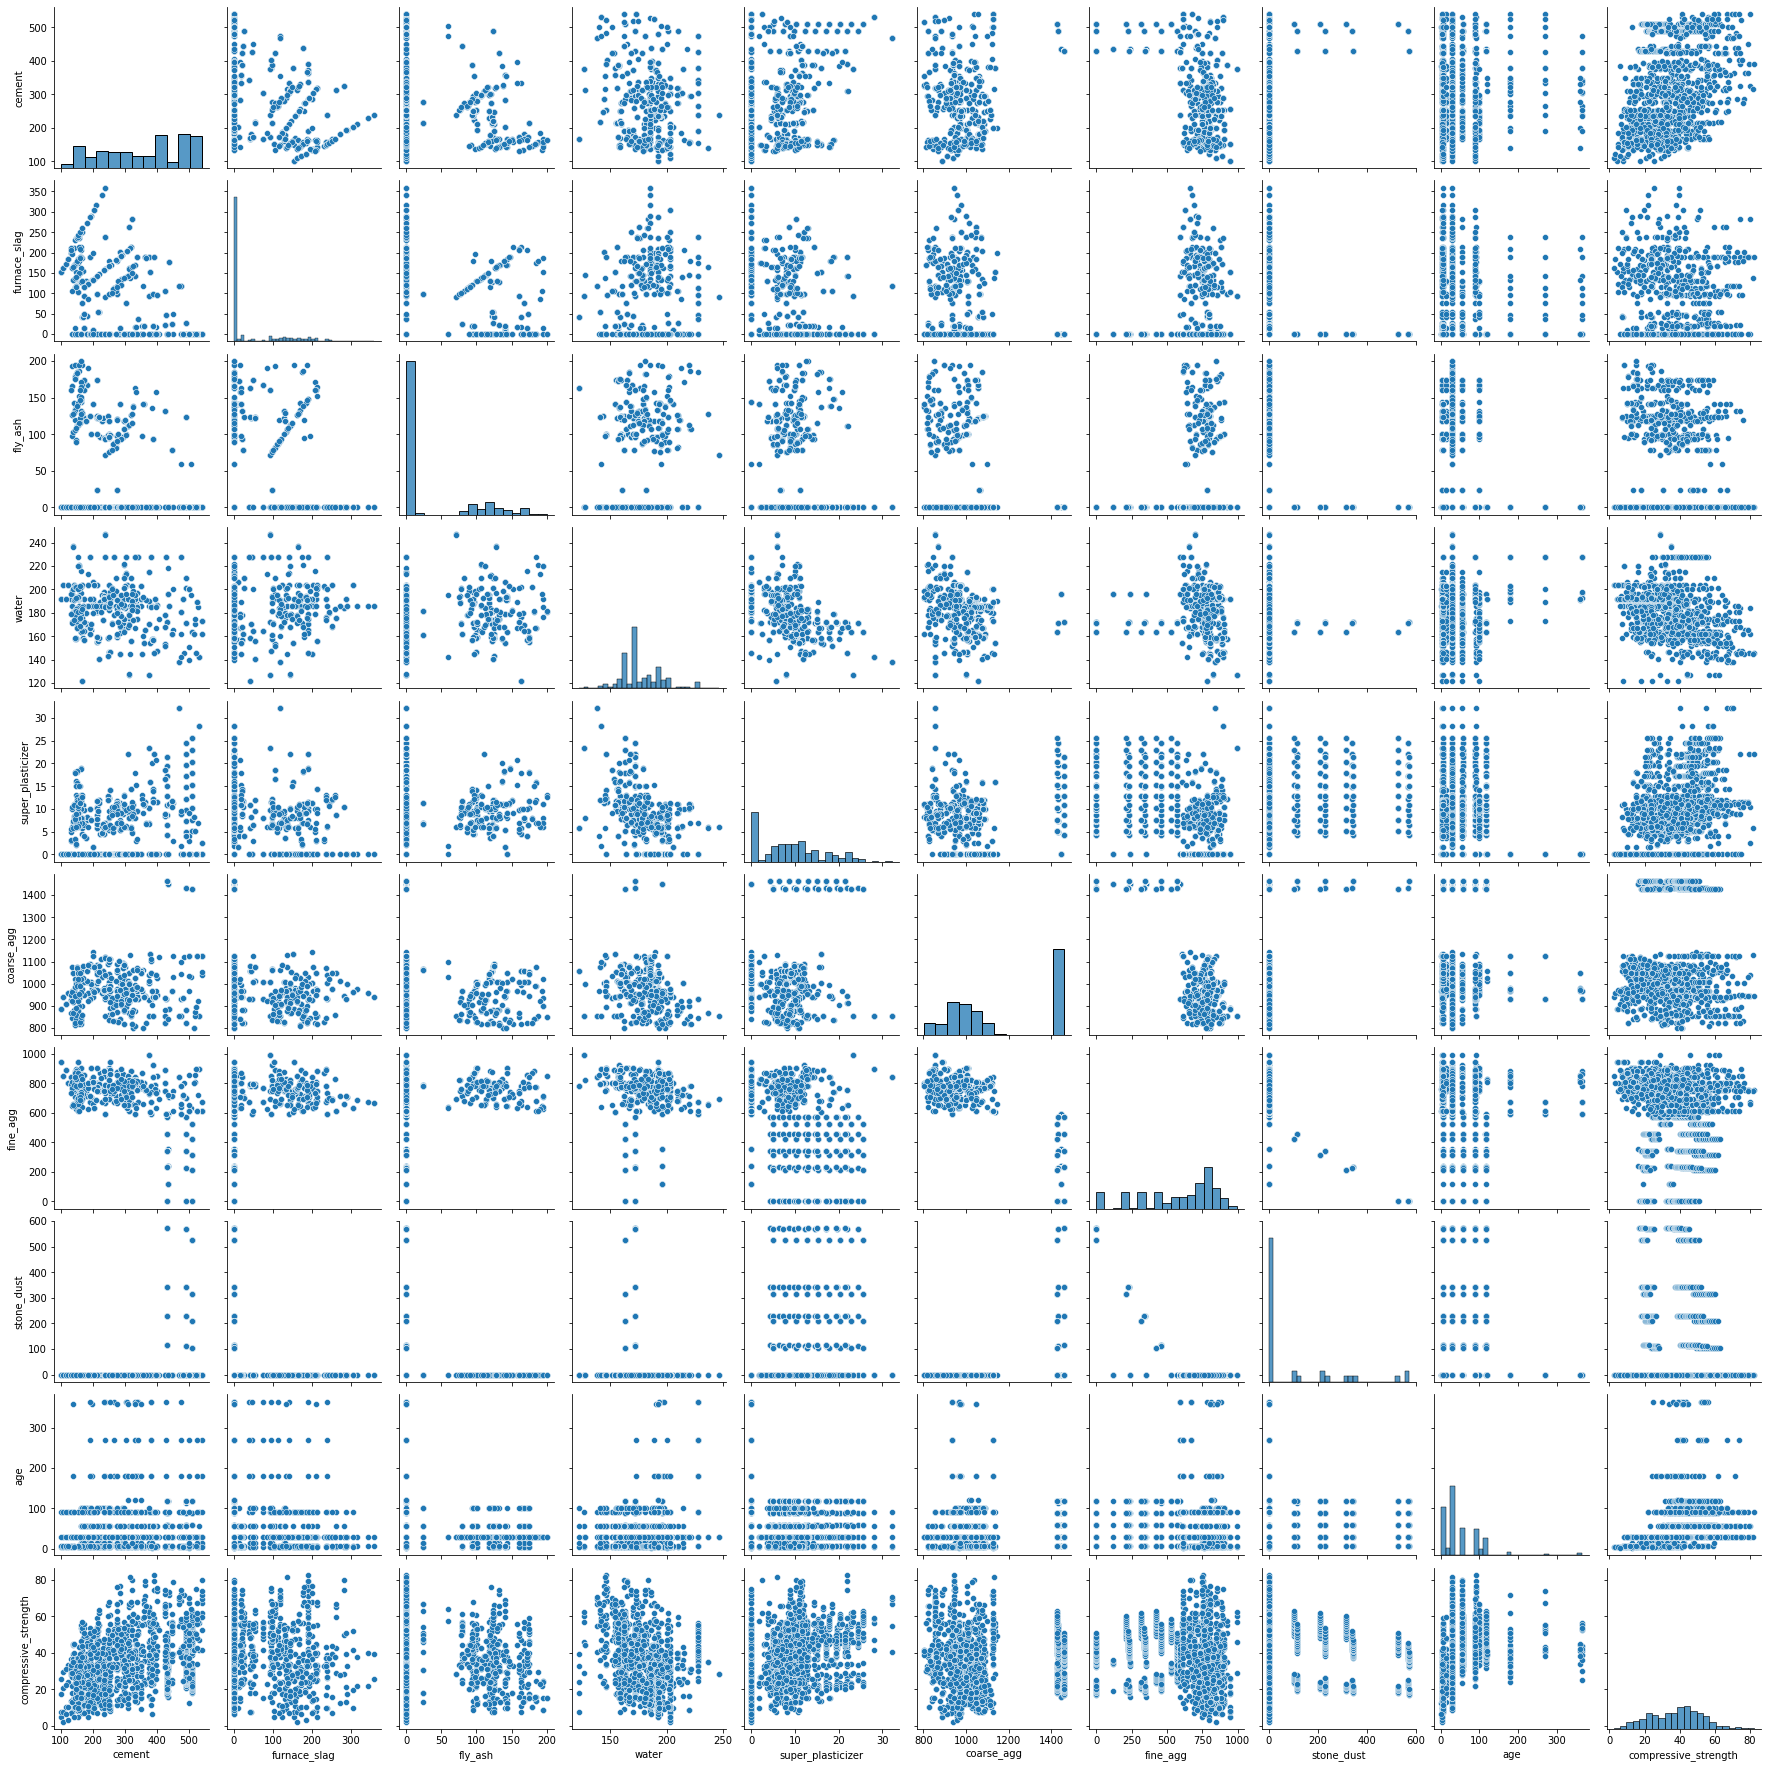

In [ ]:
sns.pairplot(dataSet)

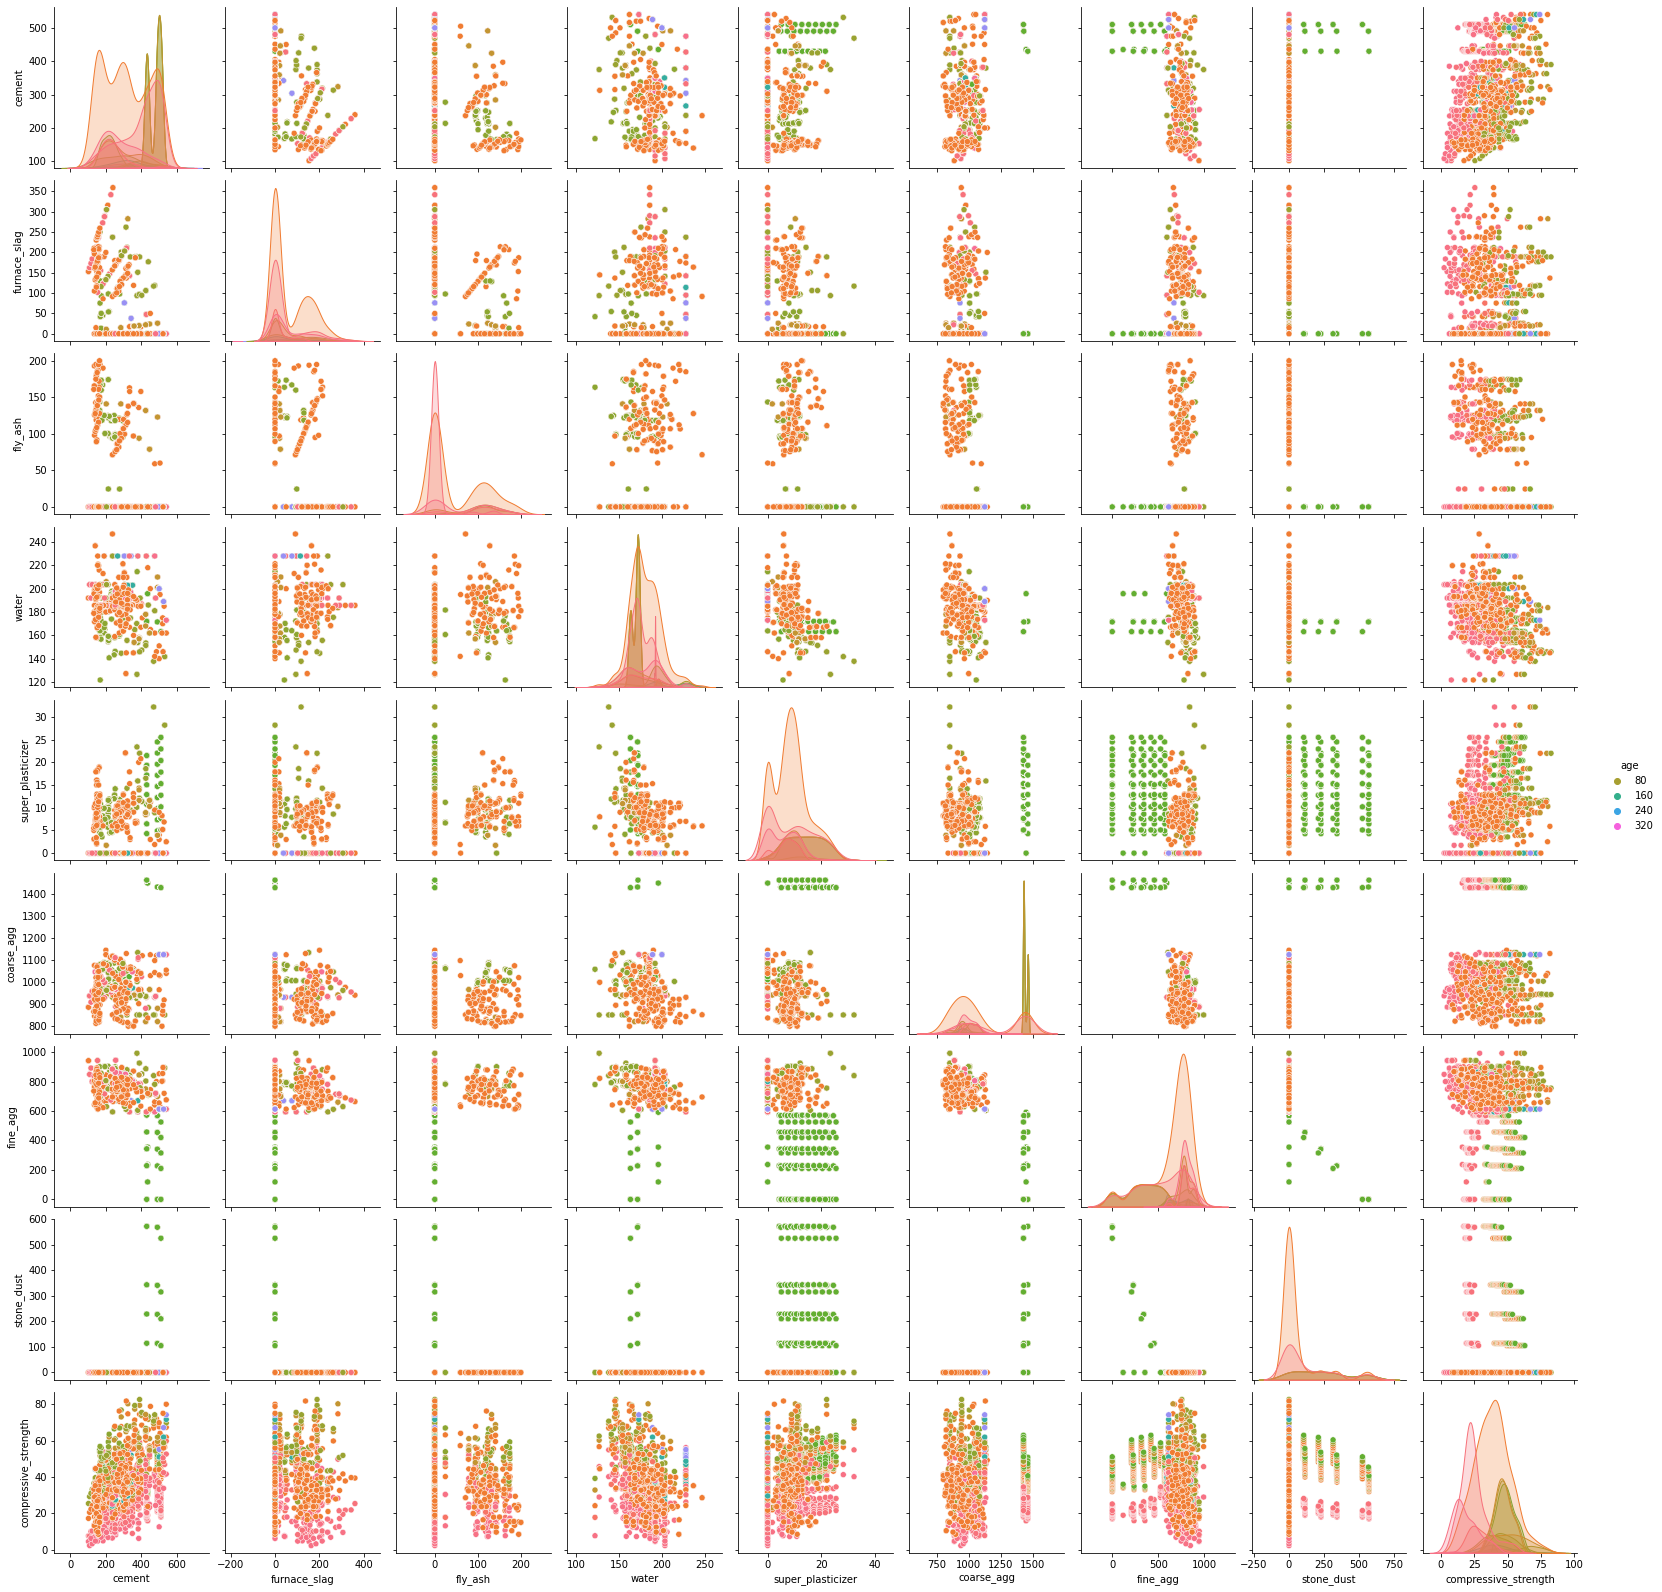

In [ ]:
sns.pairplot(dataSet, hue="age", palette="husl")

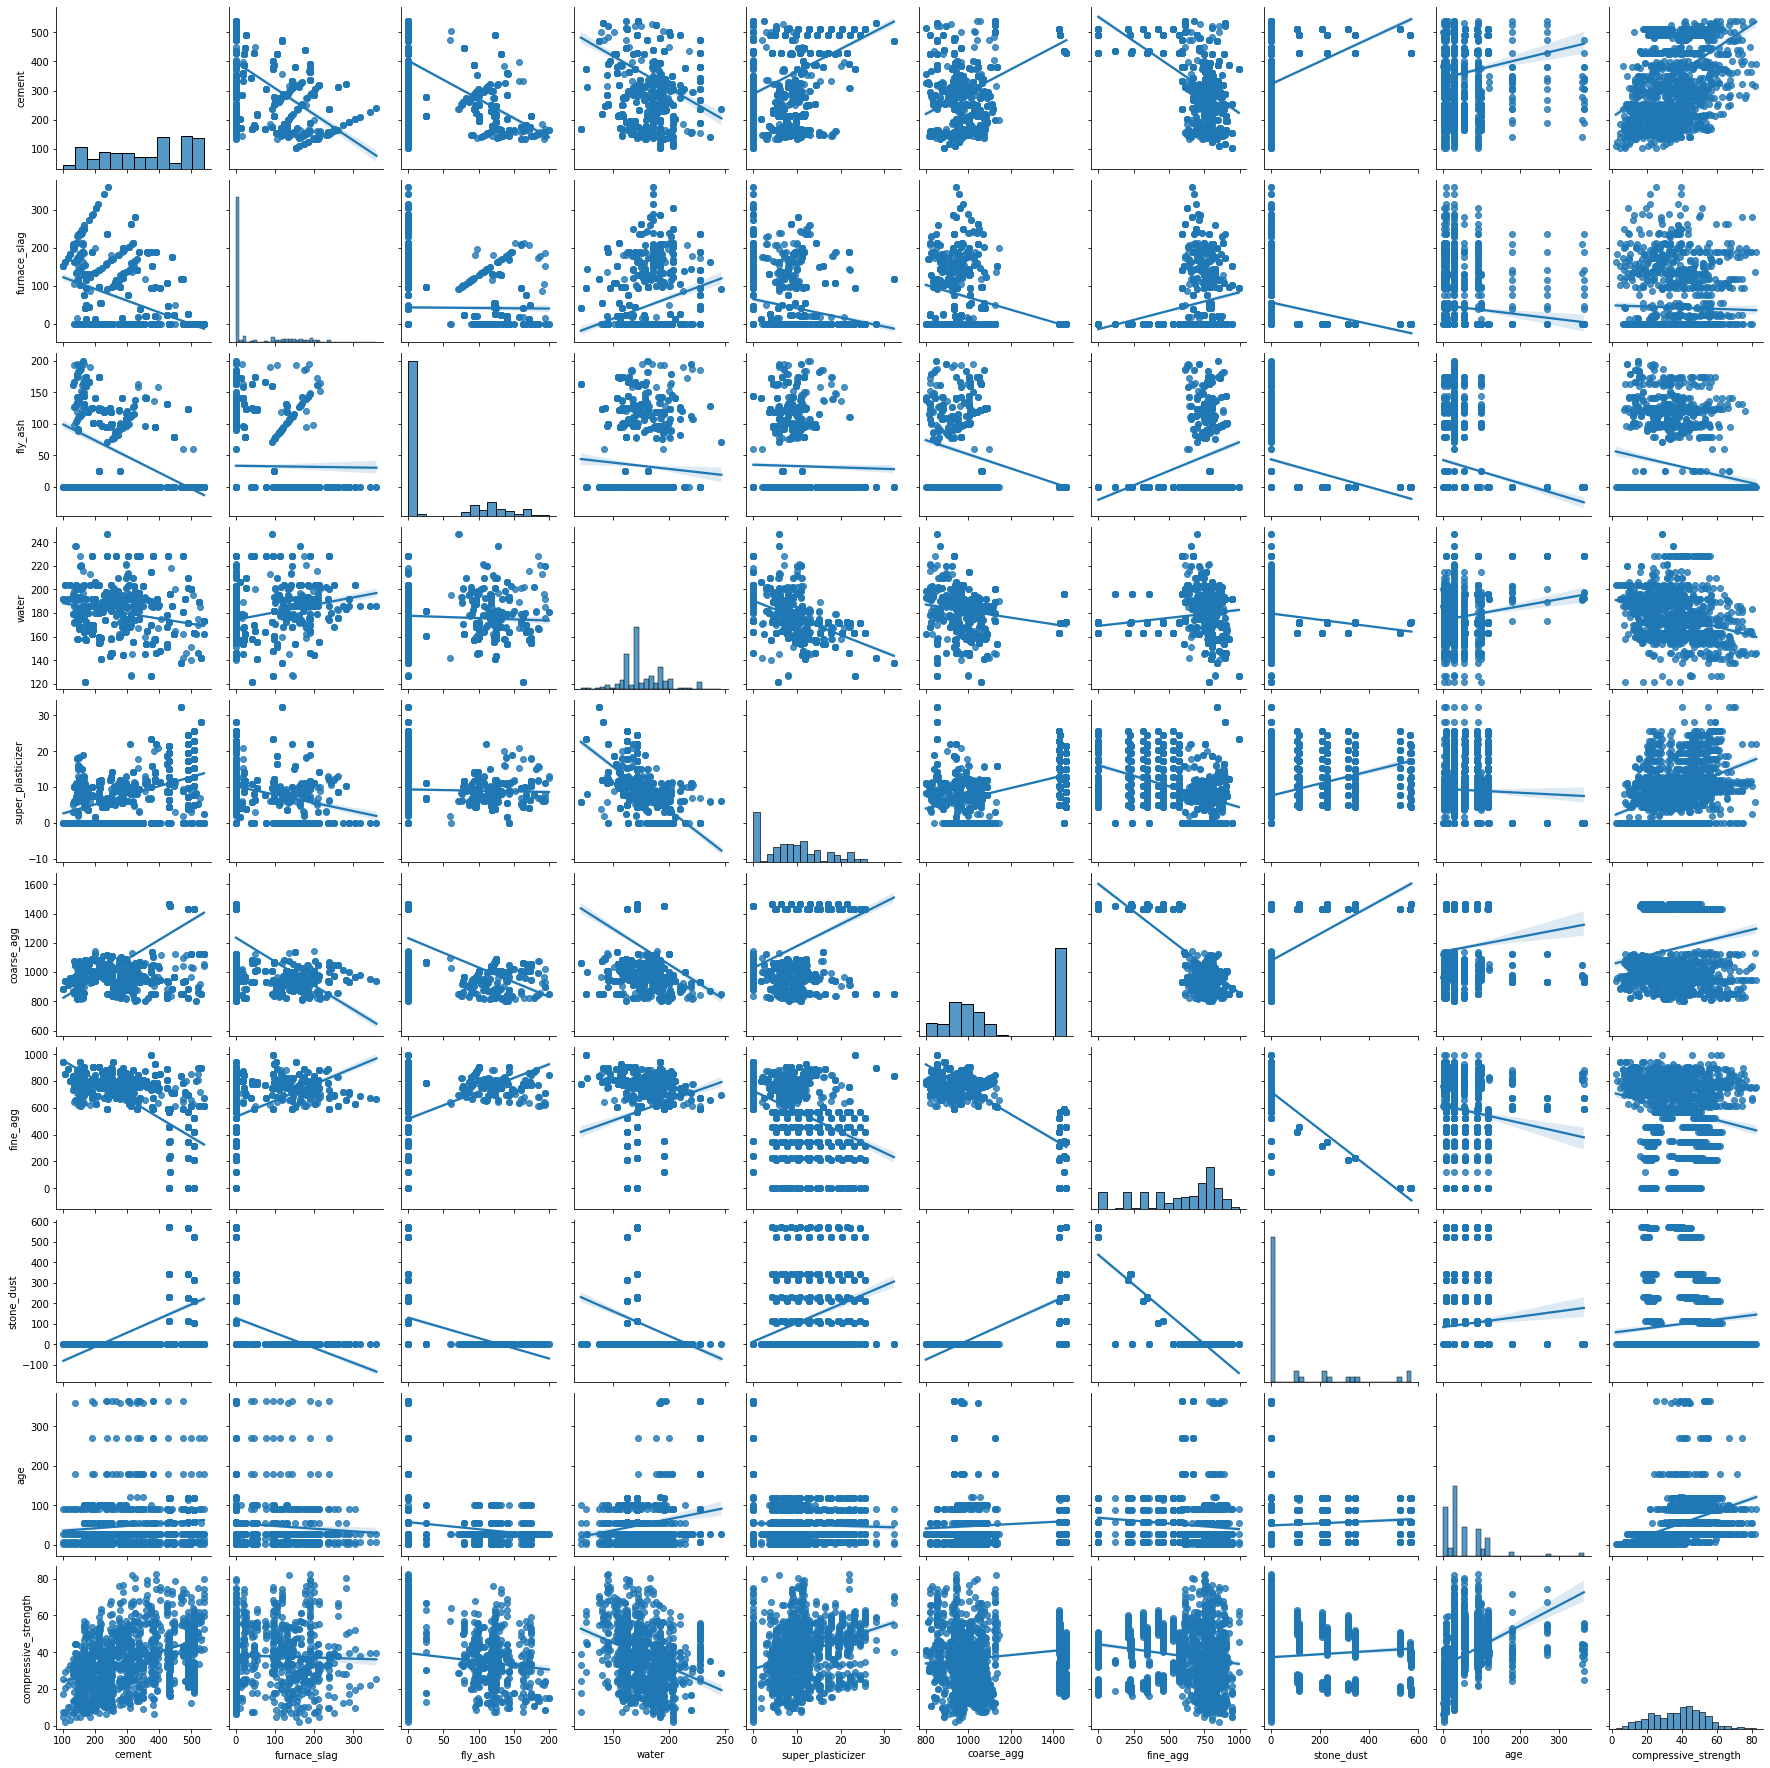

In [ ]:
sns.pairplot(dataSet, kind='reg')

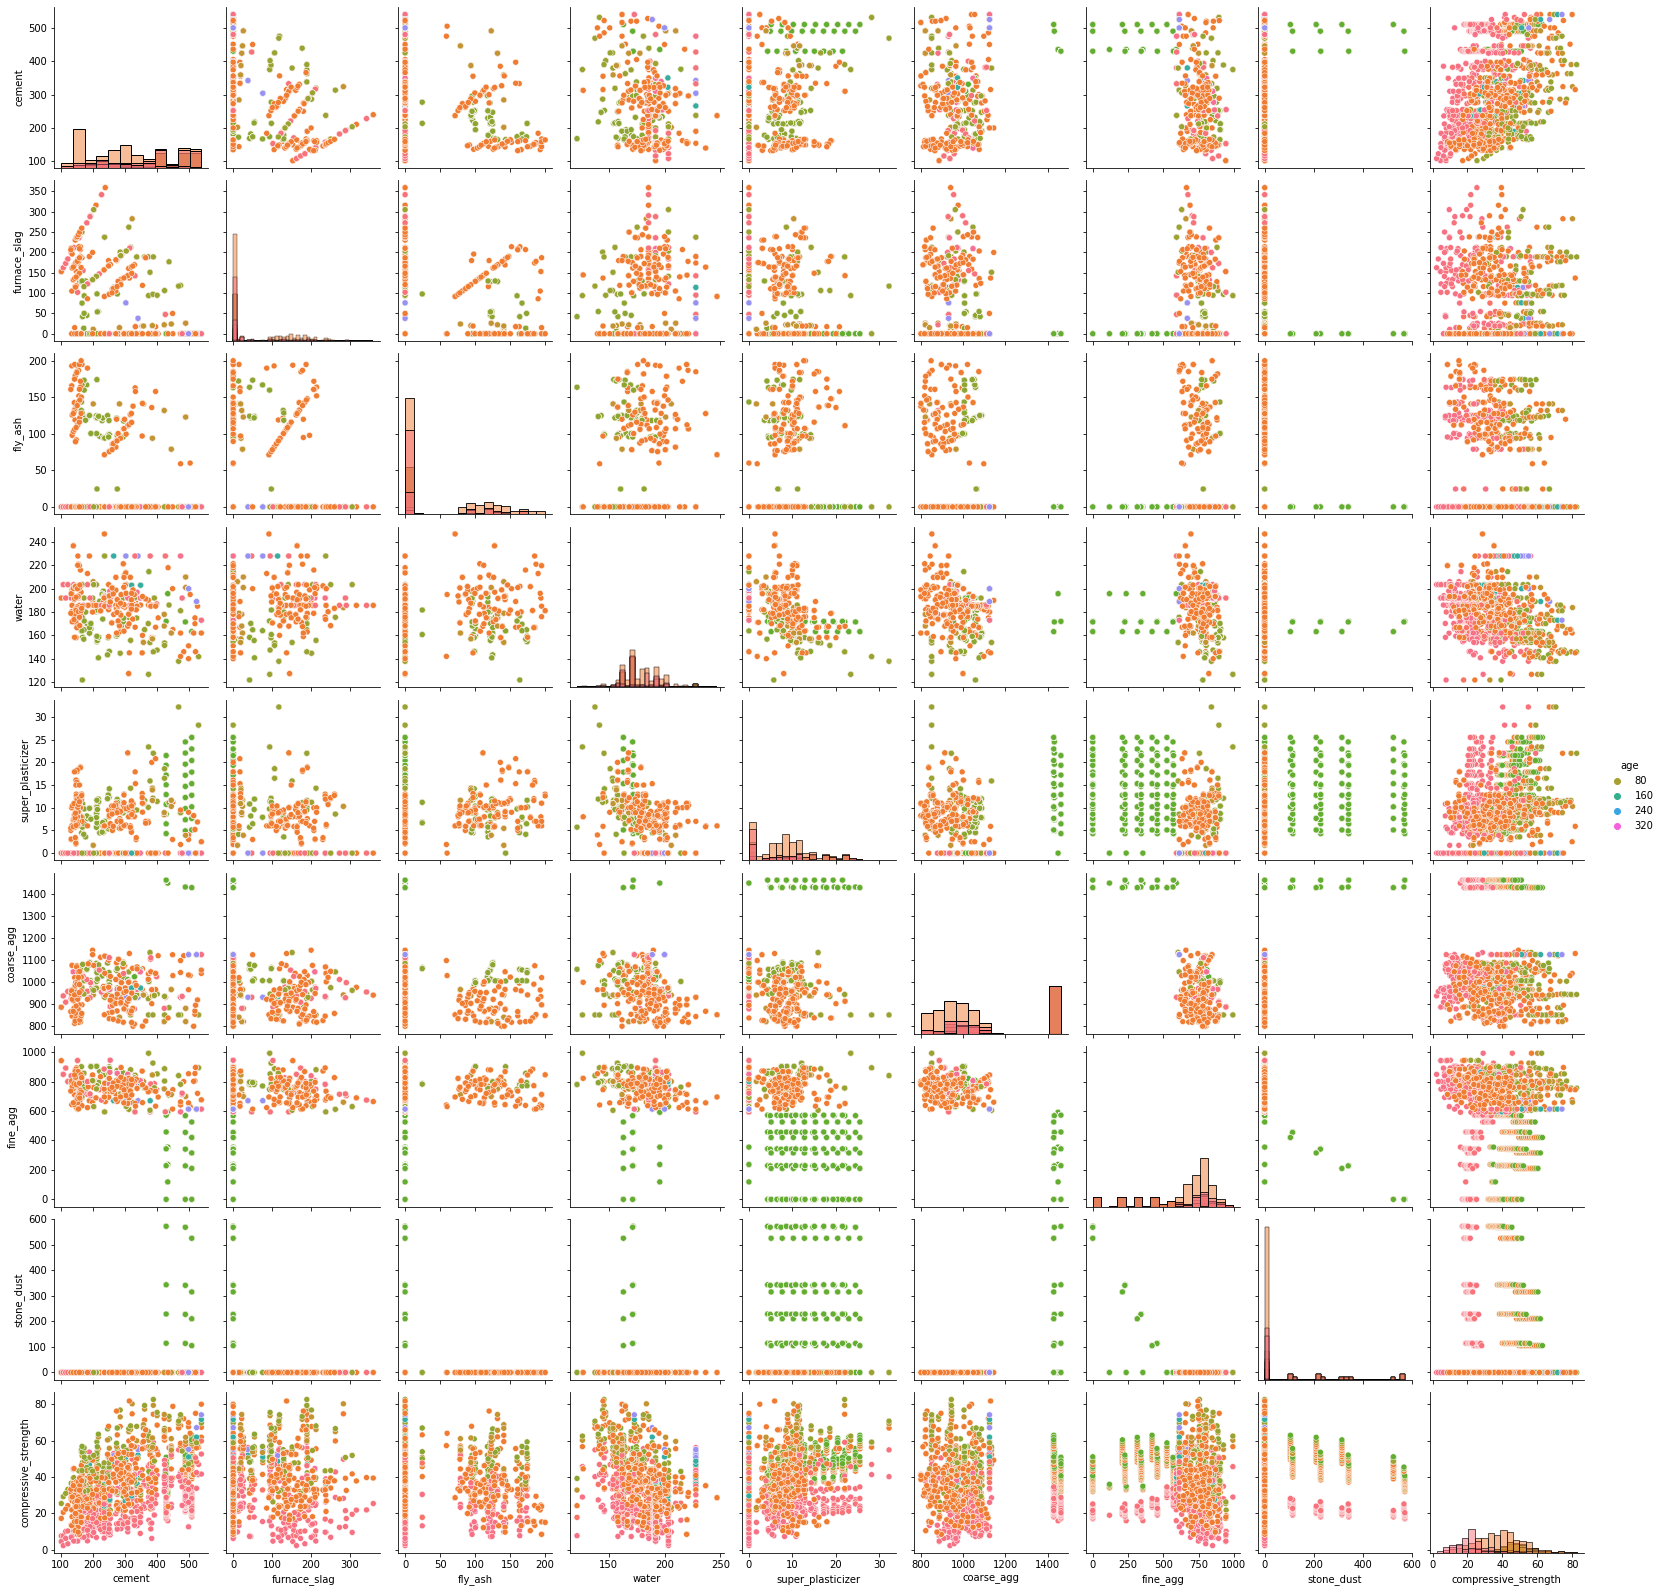

In [ ]:
sns.pairplot(dataSet, hue="age", palette="husl",diag_kind="hist")

https://seaborn.pydata.org/generated/seaborn.pairplot.html

Maybe show this to Dad, so that he may assess.


Use argument:-> var to select specific rows&cols for pairplot.

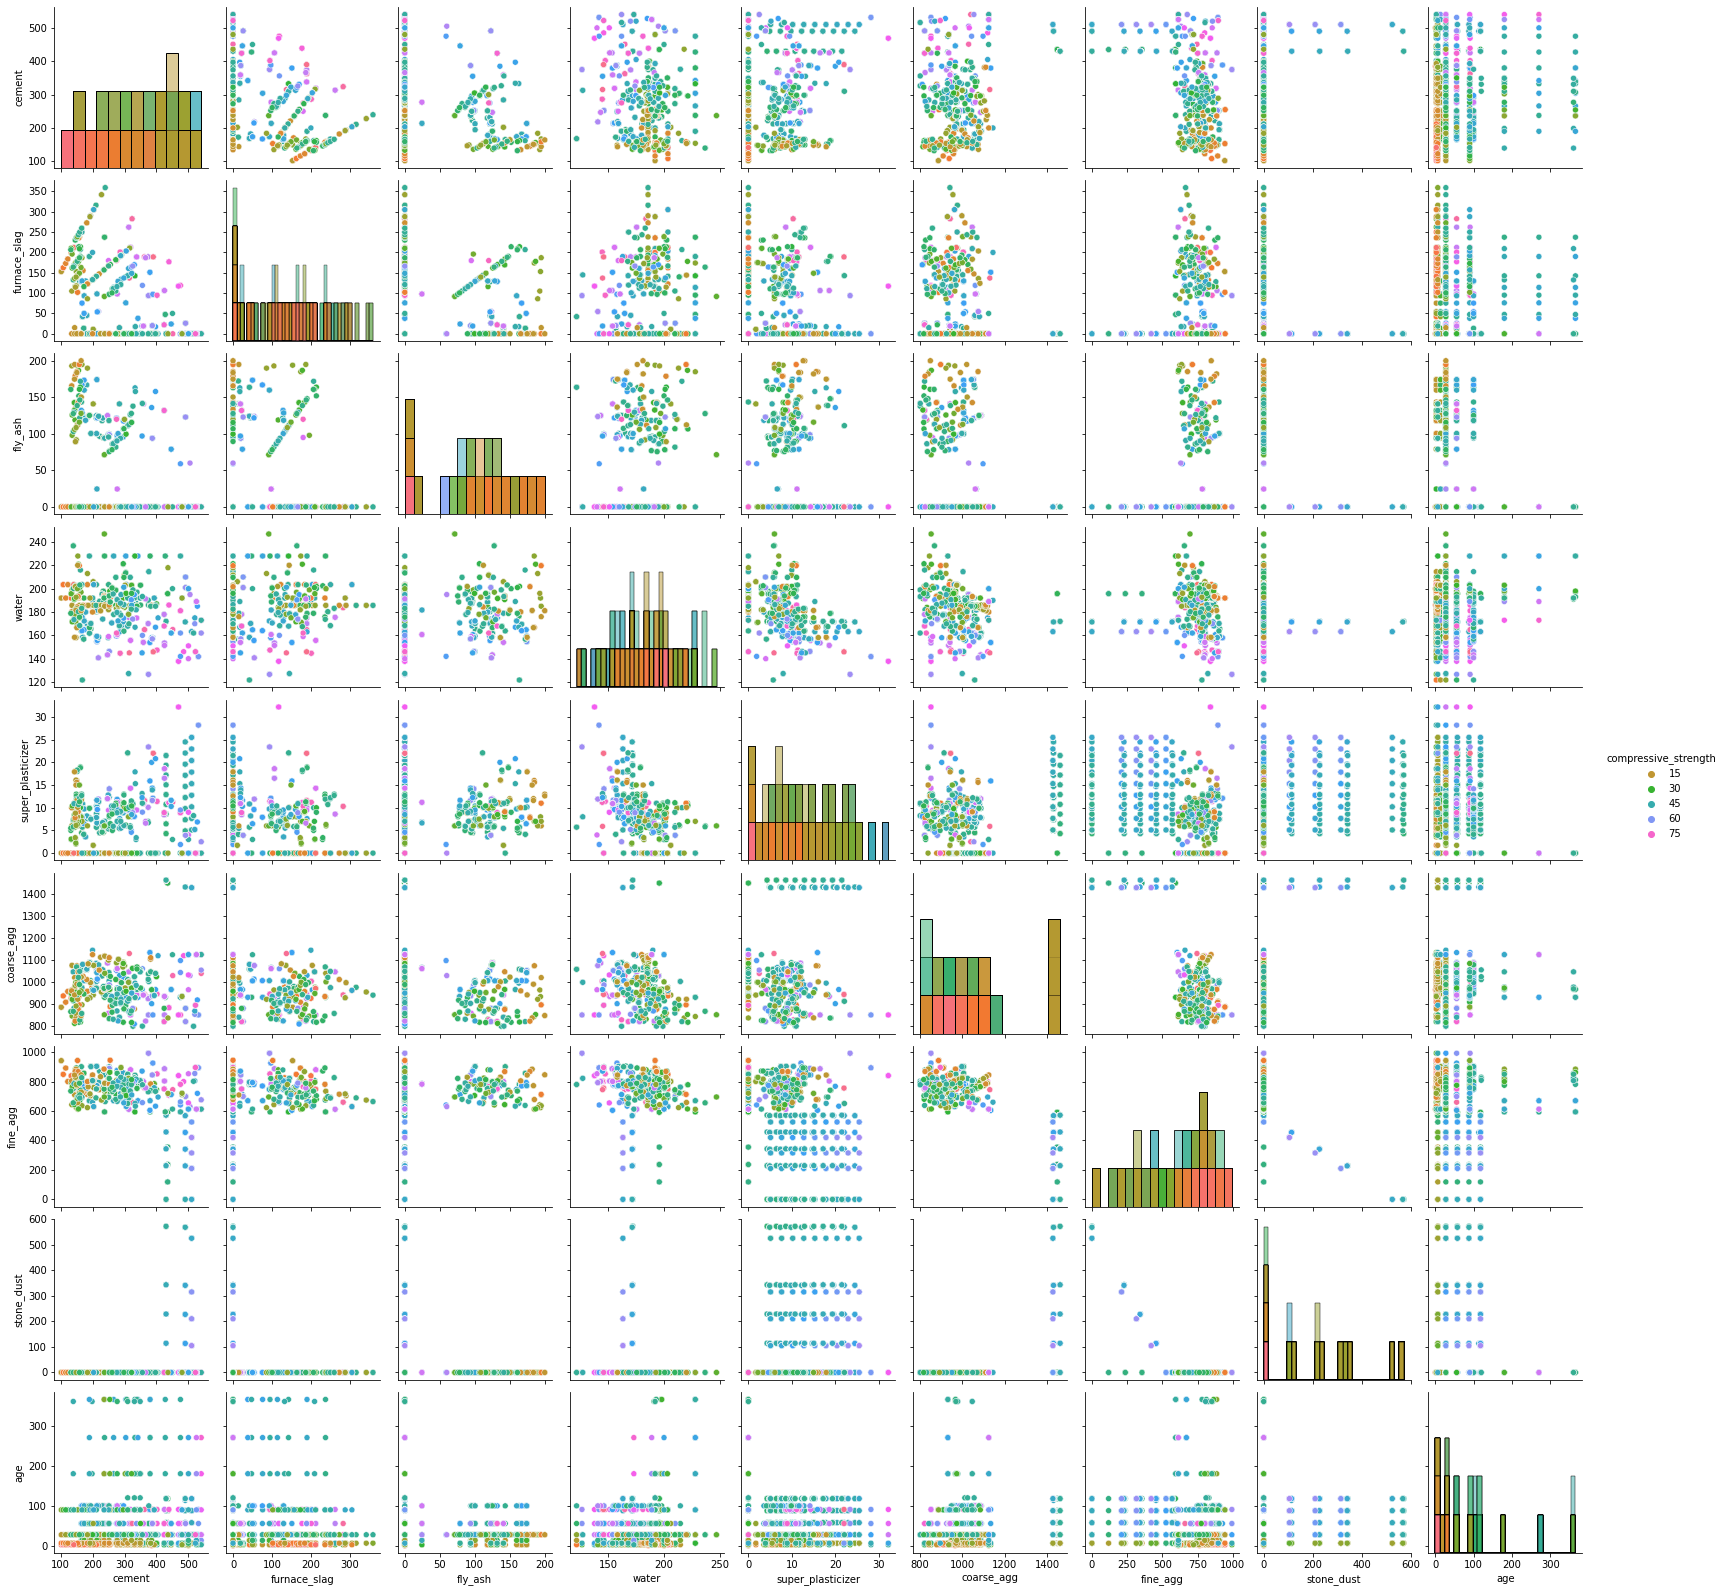

In [ ]:
sns.pairplot(dataSet, hue="compressive_strength", palette="husl",diag_kind="hist")

Text(0.5, 0, 'cement')

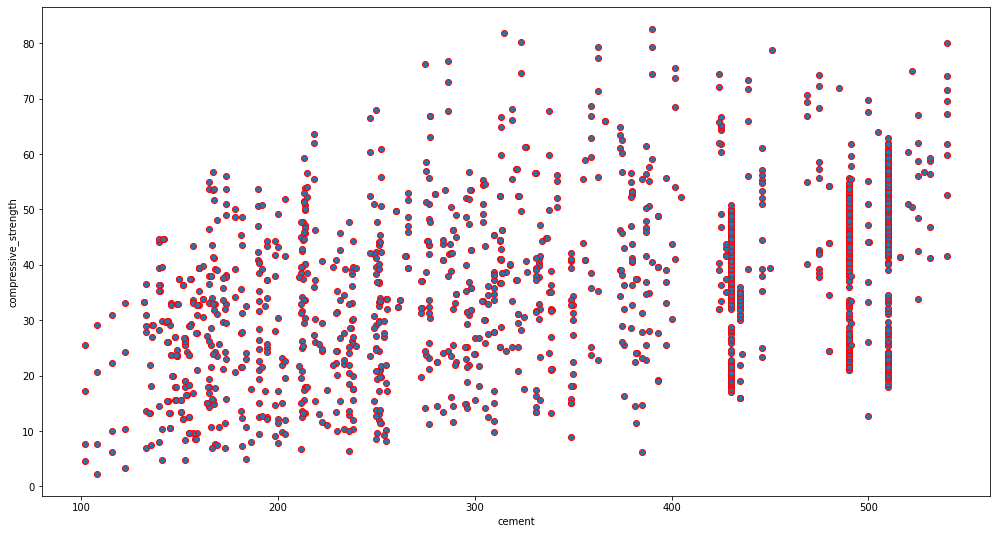

In [ ]:
# scatter plot of Concrete Strength and Cement quantity
plt.figure(figsize=[17,9])
plt.scatter(y='compressive_strength',x='cement',edgecolors='red',data=dataSet)
plt.ylabel('compressive_strength')
plt.xlabel('cement')

Text(0.5, 0, 'water')

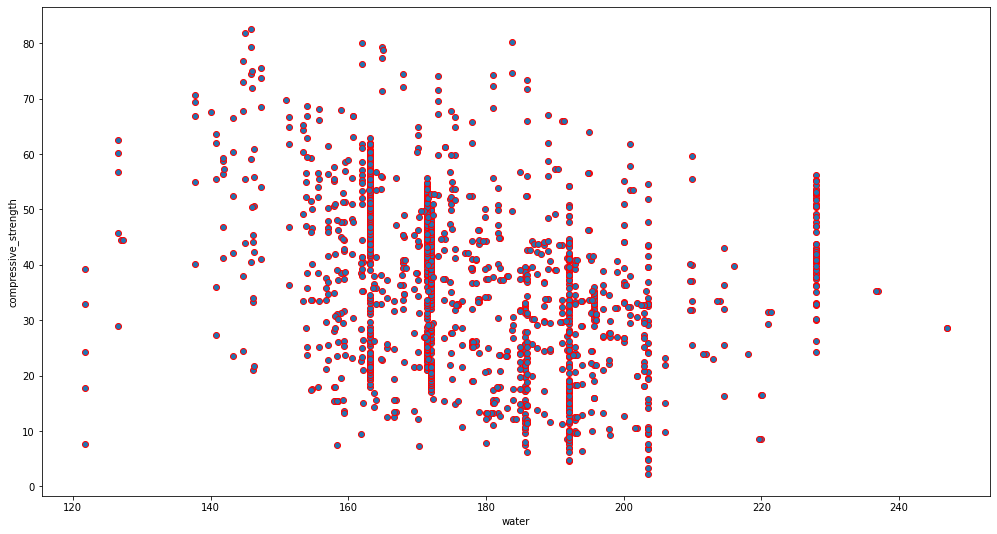

In [ ]:
# scatter plot of Concrete Strength and Water quantity
plt.figure(figsize=[17,9])
plt.scatter(y='compressive_strength',x='water',edgecolors='red',data=dataSet)
plt.ylabel('compressive_strength')
plt.xlabel('water')


This scatter plot is same as the plot in the last row, 4th column in the pairplt matrix

"The below diagonal matrix is above DM with reversed axis."

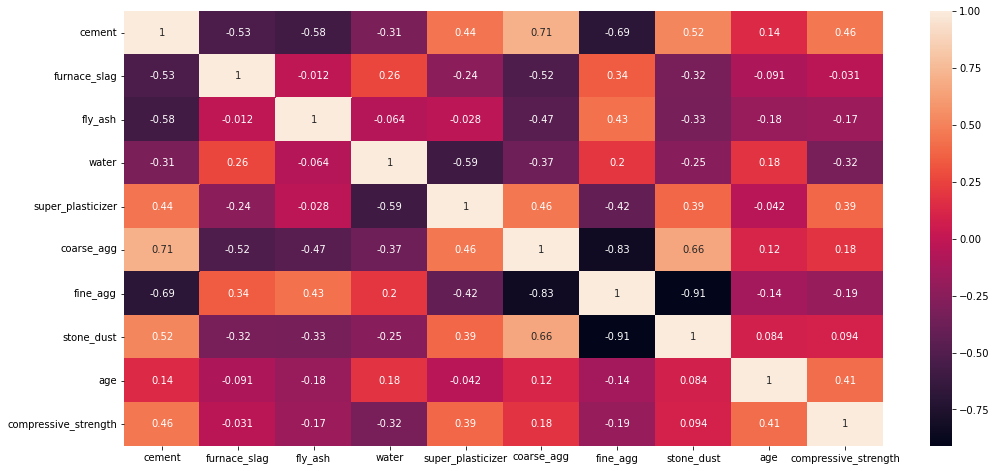

In [ ]:
plt.figure(figsize=[17,8])

#ploting correlation plot

sns.heatmap(dataSet.corr(),annot=True)

The above numeric figures in the heatmap are correlation coefficent 

https://www.analyticsvidhya.com/blog/2021/01/beginners-guide-to-pearsons-correlation-coefficient/

https://towardsdatascience.com/all-about-heatmaps-bb7d97f099d7

Pearson's Correlation Coefficient - measure of the strength and direction of a linear correlation between two variables.

The value ranges [-1,+1] ; -1 means there is a negative correlation bewten the 2 variables(ie. the increase of one, leads to decrease of teh other) and 0 means no correlation and +1 means there is a positive correlation.

CHANGE color scheme with argument: cmap="YlGnBu"

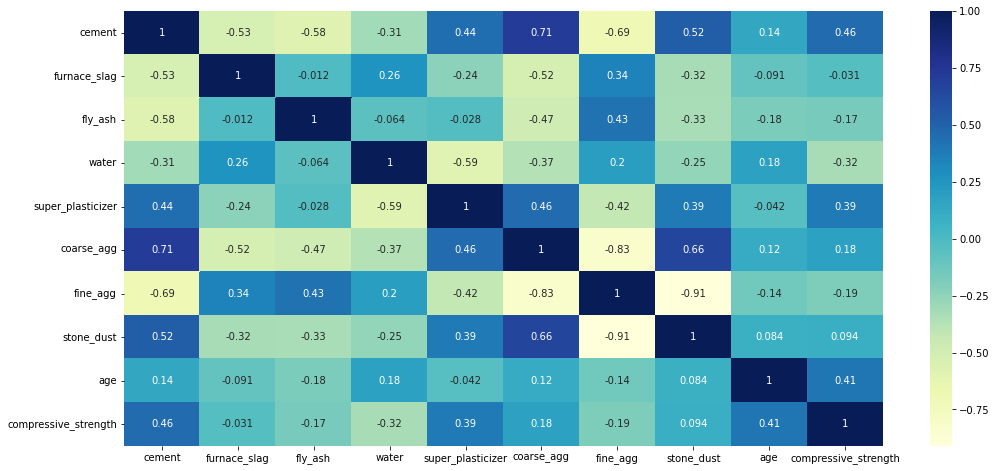

In [ ]:
plt.figure(figsize=[17,8])

#ploting correlation plot

sns.heatmap(dataSet.corr(),annot=True, cmap="YlGnBu")

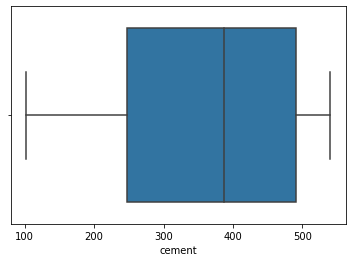

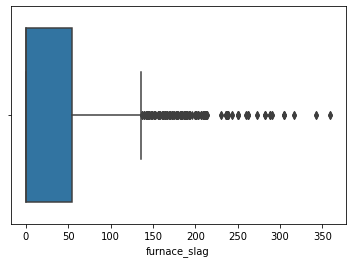

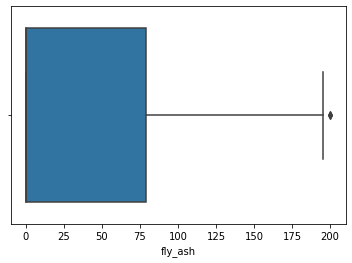

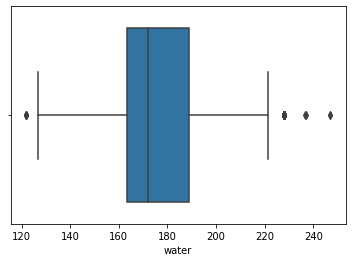

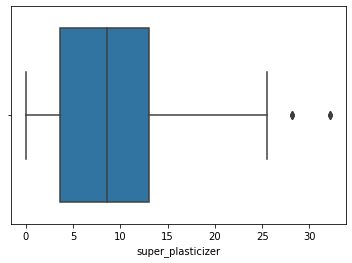

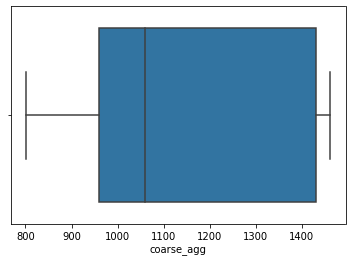

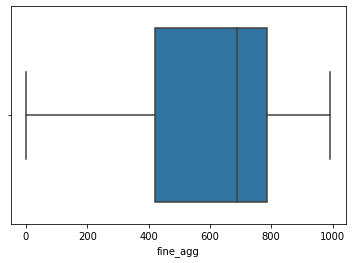

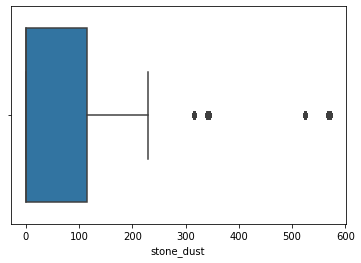

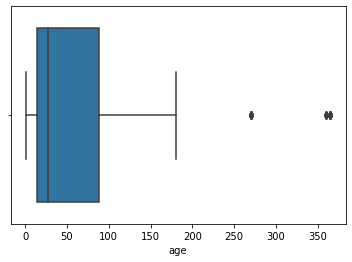

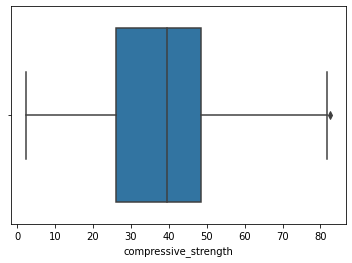

In [ ]:
#l=['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age','csMPa']
l=data1.columns
for i in l:
    sns.boxplot(x=dataSet[i])
    plt.show()

BOXPLOT

In [ ]:
import pickle
filename="concrete_strength_random_forest_model"
savedfile=pickle.dump(model, open(filename,'wb'))

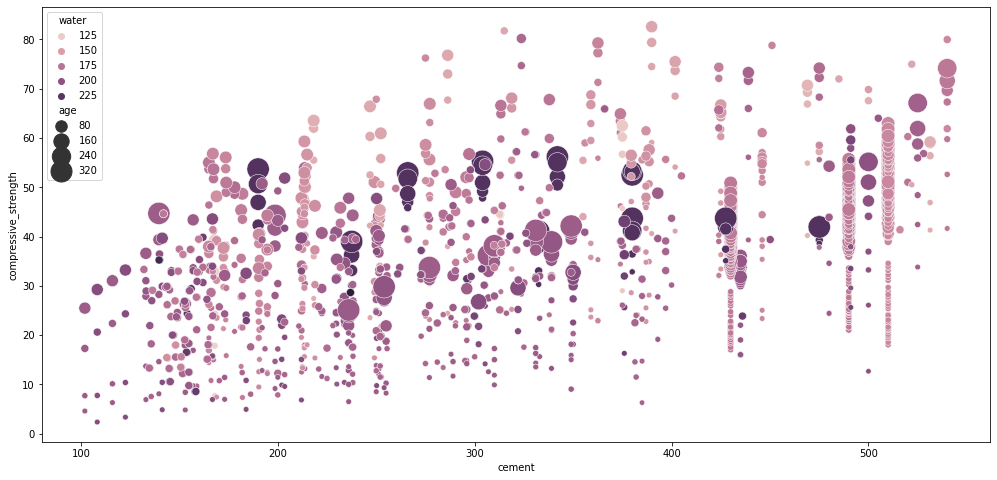

In [ ]:
plt.figure(figsize=[17,8])
sns.scatterplot(y="compressive_strength", x="cement", hue="water",size="age", data=dataSet, sizes=(30,500))
# I don't think this is accurate figuring and this can be made more intuitive and better.

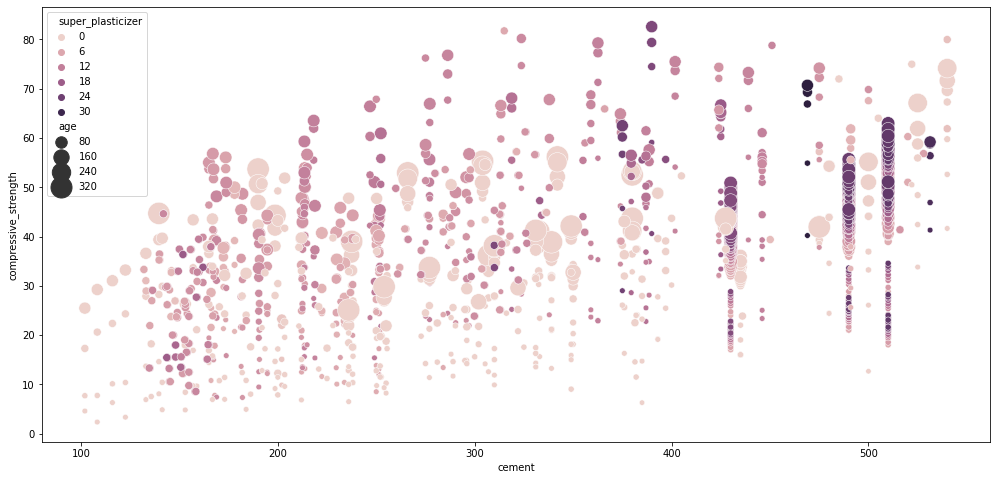

In [ ]:
plt.figure(figsize=[17,8])
sns.scatterplot(y="compressive_strength", x="cement", hue="super_plasticizer",size="age", data=dataSet, sizes=(30,500))
# I don't think this is accurate figuring and this can be made more intuitive and better.

We seem to be lacking in data of the case where age is high, superPlasticizer is greater than 30.

This case could give a more clear picture since each of these features individually are known to increase concrete strength.

In [ ]:
#plt.scatter(test_X, test_Y, color = 'red')
#plt.plot(train_X, linearRegressor.predict(train_Y), color = 'blue')

Text(0.5, 0, 'Experimental_Result')

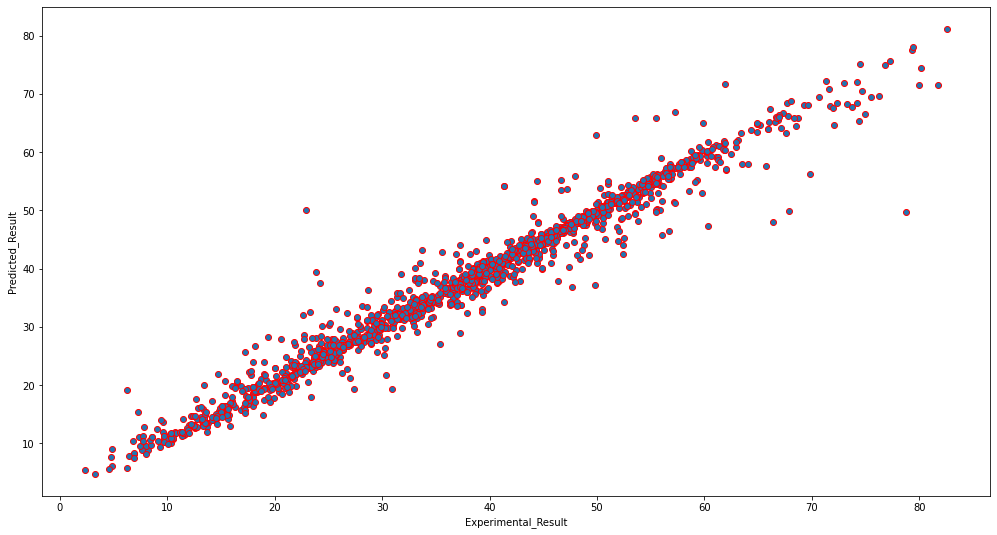

In [ ]:
predicted_data=pd.read_csv("/content/prediction_results_RF.csv")

# scatter plot of Concrete Strength Experimented and RFPredicted
plt.figure(figsize=[17,9])
plt.scatter(y='Prediction_R',x='Experimental_R',edgecolors='red',data=predicted_data)
plt.ylabel('Predicted_Result')
plt.xlabel('Experimental_Result')


In [ ]:
predicted_data["Difference"] = predicted_data["Experimental_R"] - predicted_data["Prediction_R"]
predicted_data.head

<bound method NDFrame.head of       Unnamed: 0  cement  ...  Prediction_R  Difference
0              0  331.00  ...     38.025501   -0.111216
1              1  255.00  ...      8.794392   -0.590318
2              2  510.00  ...     51.568267    0.065633
3              3  510.00  ...     54.479443   -0.215443
4              4  152.00  ...     13.208978   -1.032832
...          ...     ...  ...           ...         ...
1700        1700  510.00  ...     51.233684    0.771016
1701        1701  355.90  ...     40.030859    0.837831
1702        1702  313.30  ...     37.636973   -0.832054
1703        1703  251.37  ...     40.956950    2.624828
1704        1704  510.00  ...     31.556501    0.699499

[1705 rows x 13 columns]>

In [ ]:
import sklearn
sklearn.__version__


'0.22.2.post1'

In [ ]:
!pip install sklearn --upgrade 1.1

ERROR: Could not find a version that satisfies the requirement 1.1 (from versions: none)
ERROR: No matching distribution found for 1.1
